Importing the library for deep neural networks, pre-installed on Google colab!

In [27]:
import tensorflow as tf

Loading some important stuff

In [41]:
# Creating a model
from tensorflow.keras.models import Sequential 

# Elements of neural network
from tensorflow.keras.layers import Conv2D, GlobalAvgPool2D, Dense, MaxPool2D, Dropout

# Loss/Error function for binary classification (my face, not my face)
from tensorflow.keras.losses import BinaryCrossentropy 

Creating a deep convolutional neural network

In [42]:
# Amount of filters in the first layer, e.g. 16
f = 16

m = Sequential([
    #### FEATURE EXTRACTION
    Conv2D(f, (5,5), strides=2, padding='same', input_shape=(128,128,3), activation='relu'),
    Conv2D(f*2, (3,3), strides=2, padding='same', activation='relu'),
    Conv2D(f*4, (3,3), strides=1, padding='same', activation='relu'),
    Conv2D(f*4, (3,3), strides=1, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(f*4, (3,3), strides=1, padding='same', activation='relu'),
    Conv2D(f*4, (3,3), strides=1, padding='same', activation='relu'),
    MaxPool2D(),
    GlobalAvgPool2D(),
    # FULLY CONNECTED LAYER
    Dense(256),
    # REMOVE RANDOMLY SOME NEURONS TO FOSTER GENERALIZATION
    Dropout(0.2),
    # 1 output with sigmoid, values between 0 and 1, 
    # closer to 0 - not my face
    # closer to 1 - my face
    Dense(1, activation='sigmoid') 
])

# Model summary

In [43]:
m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 16)        1216      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)       

# Data loading and preprocessing

In [44]:
from glob import glob
from tqdm.notebook import tqdm
import numpy as np
import imageio as io
from sklearn.model_selection import train_test_split

In [52]:
# Load the data
# Change the folders accordingly
me = glob("extracted_faces/*.jpg")
them = glob("celeba_5000_clean/*.jpg")[:len(me)*2]

# Generate the labels
y = [1] * len(me) + [0] * len(them)

# Load the images and normalize them
X = np.asarray([np.asarray(io.imread(i), dtype=np.float32)/255. for i in tqdm(me+them)])

# Dividing data to evaluate deep neural network
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

HBox(children=(FloatProgress(value=0.0, max=216.0), HTML(value='')))

In [53]:
m.compile("adam", BinaryCrossentropy(), metrics=['acc'])

Train the network for 20 epochs (show each image 20 times), shuffle the images every epoch

In [54]:
h = m.fit(X_train, y_train, validation_split=0.1, shuffle=True, epochs=20)

Train on 154 samples, validate on 18 samples
Epoch 1/20
154/154 [==============================] - 2s 11ms/sample - loss: 0.5636 - acc: 0.6948 - val_loss: 0.3454 - val_acc: 0.7778
Epoch 2/20
154/154 [==============================] - 0s 2ms/sample - loss: 0.3862 - acc: 0.7143 - val_loss: 0.2486 - val_acc: 0.7778
Epoch 3/20
154/154 [==============================] - 0s 2ms/sample - loss: 0.3389 - acc: 0.8377 - val_loss: 0.1951 - val_acc: 1.0000
Epoch 4/20
154/154 [==============================] - 0s 2ms/sample - loss: 0.2816 - acc: 0.8766 - val_loss: 0.1649 - val_acc: 0.9444
Epoch 5/20
154/154 [==============================] - 0s 2ms/sample - loss: 0.2467 - acc: 0.9221 - val_loss: 0.1260 - val_acc: 0.9444
Epoch 6/20
154/154 [==============================] - 0s 2ms/sample - loss: 0.1252 - acc: 0.9740 - val_loss: 0.0371 - val_acc: 1.0000
Epoch 7/20
154/154 [==============================] - 0s 2ms/sample - loss: 0.2967 - acc: 0.9156 - val_loss: 0.4582 - val_acc: 0.8333
Epoch 8/20
154/1

Text(0,0.5,'loss')

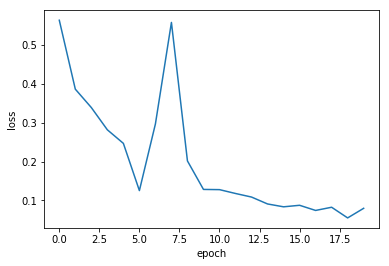

In [60]:
plt.plot(h.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")

In [56]:
m.evaluate(X_test, y_test)

44/44 [==============================] - 0s 818us/sample - loss: 0.1001 - acc: 0.9773


[0.10008537498387424, 0.97727275]

In [57]:
y_pred = m.predict(X_test)

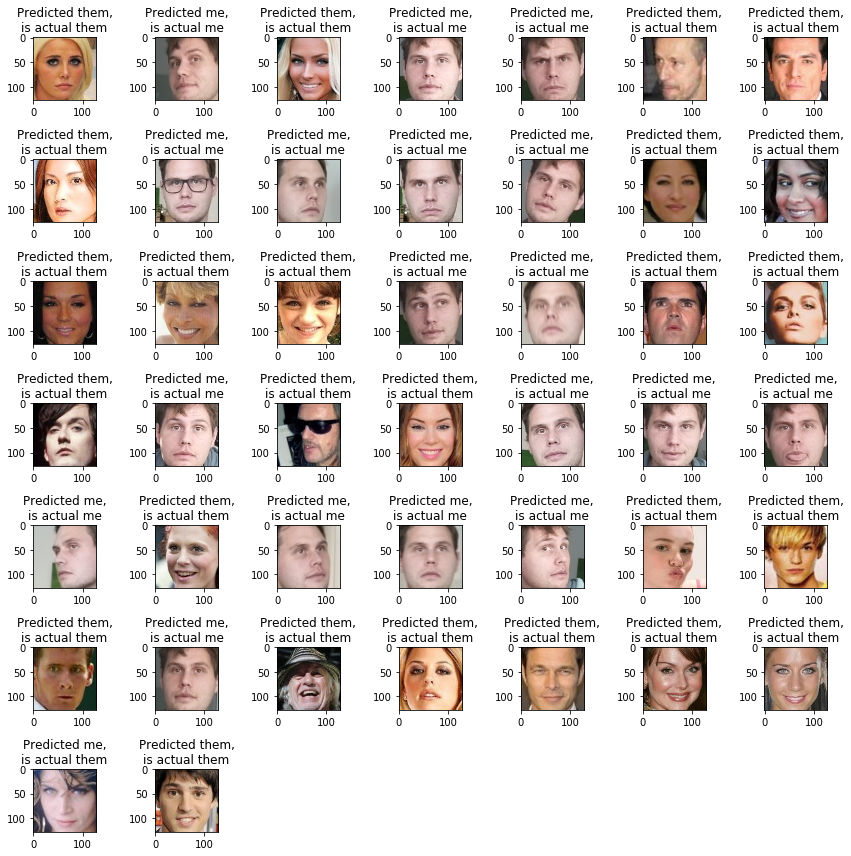

In [58]:
subplots= np.ceil(np.sqrt(y_pred.shape[0]))

plt.figure(figsize=(12,12))

for i in range(y_pred.shape[0]):
    p = "me" if y_pred[i] > 0.5 else "them"
    a = "me" if y_test[i] > 0.5 else "them"
    
    plt.subplot(subplots, subplots, 1+i)
    plt.imshow(X_test[i])
    plt.title(f"Predicted {p},\nis actual {a}")
    
plt.tight_layout()

Save neural network

In [51]:
m.save("face.h5")